<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Deep_Learning_using_Tensorflow/blob/main/C3_5_LSTM_for_subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import tensorflow_datasets as tfds
imdb,info=tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYBX0KU/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYBX0KU/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYBX0KU/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data,test_data=imdb["train"],imdb["test"]

In [4]:
tokenizer=info.features["text"].encoder

In [5]:
tokenizer.subwords;

In [6]:
sample_string="TensorFlow, from basics to mastery"
tokenized_string=tokenizer.encode(sample_string)
print("tokenizer string is {}".format(tokenized_string))
original_string=tokenizer.decode(tokenized_string)
print("original string is {}".format(original_string))

tokenizer string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
original string is TensorFlow, from basics to mastery


In [7]:
for ts in tokenized_string:
  print("{}----->{}".format(ts,tokenizer.decode([ts])))

6307----->Ten
2327----->sor
4043----->Fl
2120----->ow
2----->, 
48----->from 
4249----->basi
4429----->cs 
7----->to 
2652----->master
8050----->y


In [8]:
buffer_size=10000
batch_size=64

train_dataset=train_data.shuffle(buffer_size)
train_dataset=train_dataset.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset=test_data.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(test_data))

In [9]:
embedding_dim=64
model=tf.keras.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(6,activation="relu"),
  tf.keras.layers.Dense(1,activation="relu")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 590,669
Trainable params: 590,669
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
history=model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 1053s 3s/step - loss: 0.7441 - accuracy: 0.5860 - val_loss: 0.6693 - val_accuracy: 0.6112
Epoch 2/5
391/391 [==============================] - 1038s 3s/step - loss: 0.6364 - accuracy: 0.6966 - val_loss: 0.5861 - val_accuracy: 0.6833
Epoch 3/5
391/391 [==============================] - 1026s 3s/step - loss: 0.4995 - accuracy: 0.7736 - val_loss: 0.5614 - val_accuracy: 0.7166
Epoch 4/5
391/391 [==============================] - 1031s 3s/step - loss: 0.4497 - accuracy: 0.8100 - val_loss: 0.5398 - val_accuracy: 0.7540
Epoch 5/5
391/391 [==============================] - 1074s 3s/step - loss: 0.5435 - accuracy: 0.7215 - val_loss: 0.6240 - val_accuracy: 0.6760


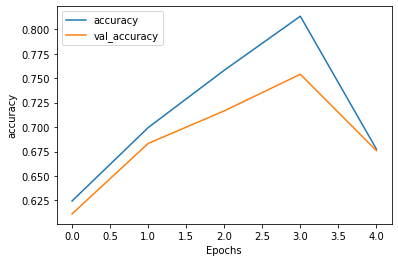

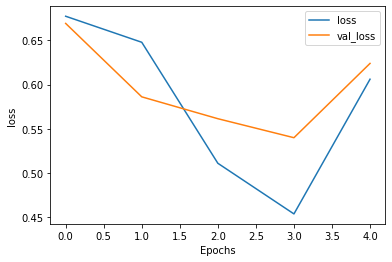

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>